In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from utils import Utils

In [225]:
# Datasets
data = pd.read_csv('data/student_performance.csv')

# Creating category and setting its int value
data['HighAchiever'] = data['FinalGrade'].apply(Utils.cat_students)

X = data[['AttendanceRate']]
y = data['HighAchiever']

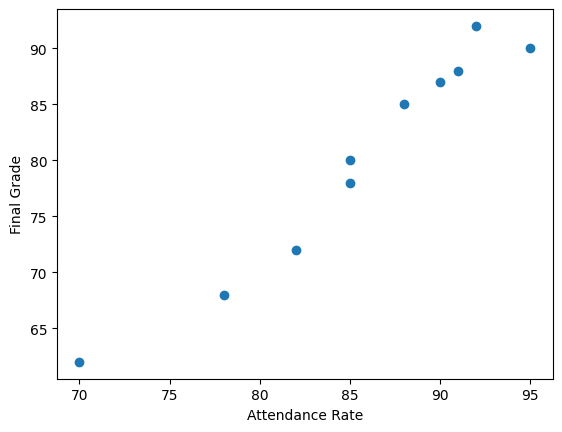

In [226]:
# Plot Data
plt.scatter(X, data['FinalGrade'])
plt.xlabel("Attendance Rate")
plt.ylabel("Final Grade")
plt.show()

In [227]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [228]:
# Predict on the test data
y_pred = model.predict(X_test)

In [229]:
# test dataframe
t_df = pd.DataFrame()
t_df["Attendance"] = X_test
t_df["Remarks"] = [Utils.get_cat_student(pred) for pred in y_pred]
print(t_df)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100: .2f} %')
print('-'*100)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # zero_division=0; any undefined precision due to zero predicted samples will be set to 0.0 without raising a warning.
print('-'*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-'*100)
print(f"Coefficients: {model.coef_}")
print('-'*100)

   Attendance       Remarks
8          82       Average
1          90  High Achiver
5          95  High Achiver
Accuracy:  100.00 %
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

----------------------------------------------------------------------------------------------------
Confusion Matrix:
[[2 0]
 [0 1]]
----------------------------------------------------------------------------------------------------
Coefficients: [[-0.94919676]]
----------------------------------------------------------------------------------------------------


In [230]:
# Save Model
model_name = "model/attendance_rate_and_its_infulence_on_final_grades.pkl"
with open(model_name, 'wb') as file:
  pickle.dump(model, file)
  print(f"Model saved in path: {model_name}")

Model saved in path: model/attendance_rate_and_its_infulence_on_final_grades.pkl
